### Scope of the project
For this project, we will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, we will analyze, prepare, and plot data in order to answer questions in a meaningful way.

### Goals
1. See what is the Life expectancy of different countries.
2. Find out if Life expectancy and GDP are correlated.
3. GDP growth of different countries.
4. Find the difference in life expectancy in developing and developed countries.
5. Make a conclusion on the analysis.

### Lode the Data and general exploration
First, load the data, after which we can explore the dataset to find general information about it. How many unique Countries? which year are included? Are there any missing values? how the data was coded? what are the types of variables? Just a broad look that will prepare us for future analysis.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
gdp_data = pd.read_csv('all_data.csv')
gdp_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [149]:
gdp_data.shape

(96, 4)

In [13]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [28]:
gdp_data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [29]:
gdp_data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

#### Modification of Data Frame ans cleaning 
We can see that some names are too long, which will cause some confusion in further analysis. We can rename the variable name.

In [30]:
gdp_data.rename(columns={
    'Life expectancy at birth (years)': 'life_length'},
    inplace=True)

We can see that data has no missing values, data types are correctly set to the right type, and 1 column name was too long, we changed it to make it easy for our further analysis. 

### Exploring the data
#### Descriptive Statistics
Now after we prepared and cleaned our data, we can start to apply descriptive statistics and plot the variables.

In [151]:
gdp_data.describe(include='all')

,Country,Year,life_length,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


We can plot the data by variables to see more in-depth information

<Figure size 640x480 with 0 Axes>

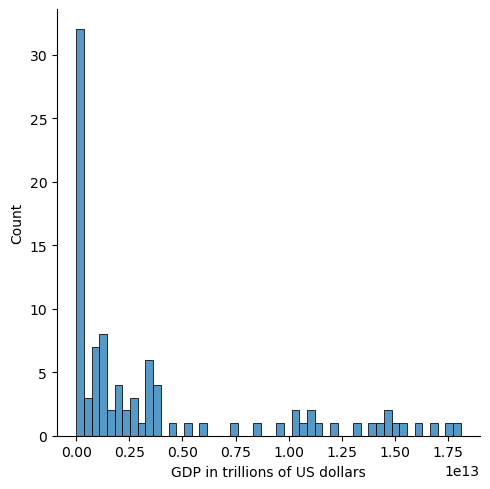

In [167]:
sns.displot(gdp_data, x="GDP", bins=50)
plt.xlabel('GDP in trillions of US dollars')
plt.show()
plt.clf()

We can see outliers gathered on the left of the chart. Left skewness.

<Figure size 640x480 with 0 Axes>

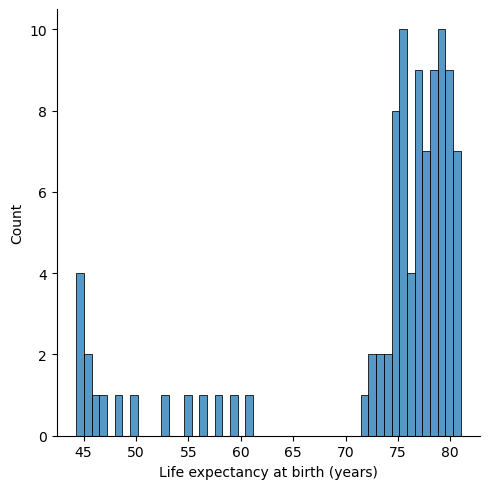

In [172]:
sns.displot(gdp_data, x="life_length", bins=50)
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.clf()

We can see outliers gathered on the right of the chart. Right skewness.

<Figure size 640x480 with 0 Axes>

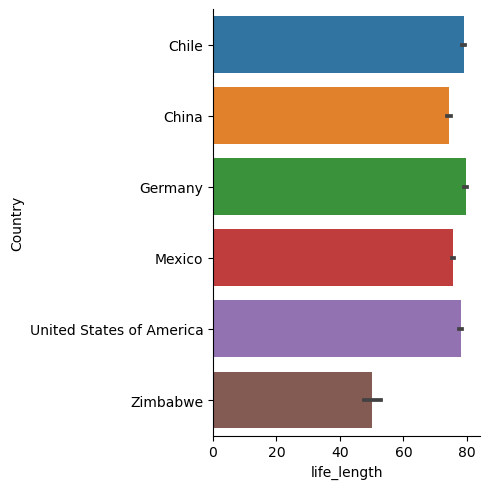

In [174]:
sns.catplot(data=gdp_data, x="life_length", y="Country", kind="bar")
plt.show()
plt.clf()

The life expectancy of the countries is not much different except in Zimbabwe, which is much less than in other countries.

<Figure size 640x480 with 0 Axes>

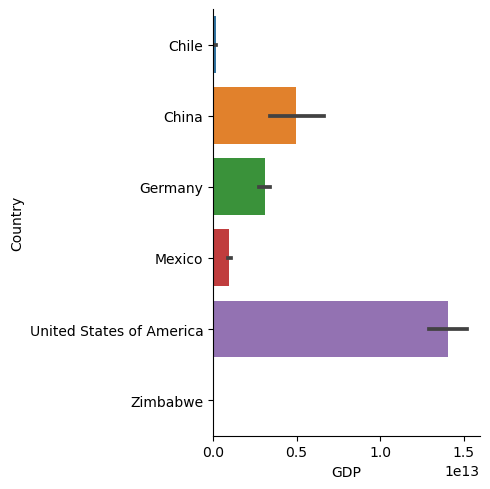

In [178]:
sns.catplot(data=gdp_data, x="GDP", y="Country", kind="bar")
plt.show()
plt.clf()

We see that the US GDP is much larger than other countries after goes China and the third is Germany.

#### Scatter Plot

We can try to plot different variables against each other, to see if there is any correlation between them

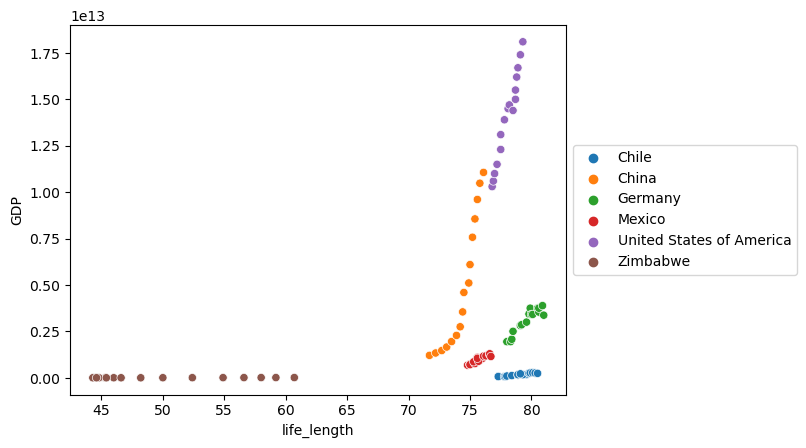

In [191]:
sns.scatterplot(x=gdp_data['life_length'], y=gdp_data['GDP'], hue=gdp_data.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

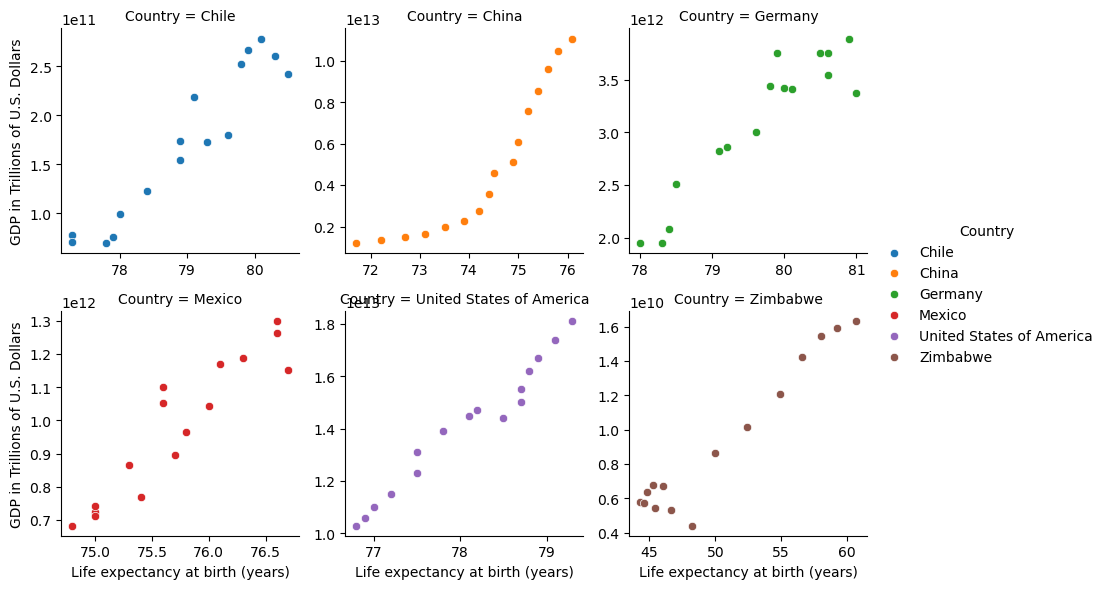

In [220]:
graph = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"life_length", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
plt.show()
plt.clf()

#### Line Chart

#### GDP of the countries

<Figure size 640x480 with 0 Axes>

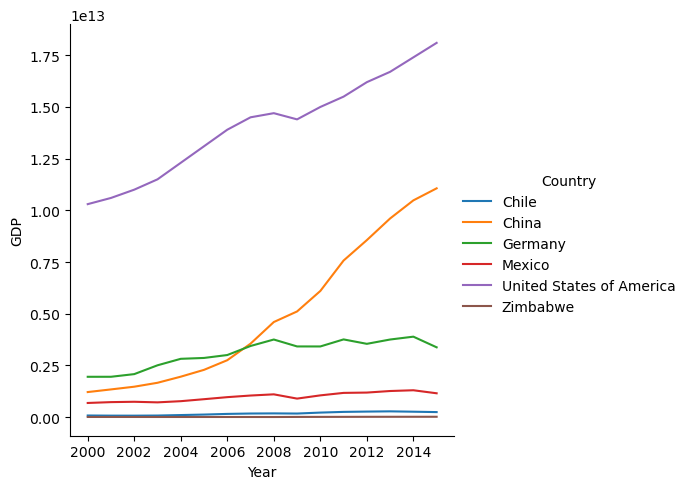

In [199]:
sns.relplot(
    data=gdp_data, kind="line",
    x="Year", y="GDP", hue="Country", 
)
plt.show()
plt.clf()

We can see that the USA, and China have growing potential compared to the other 4 countries. Also that China has a strong start of growth after 2004!

<Figure size 640x480 with 0 Axes>

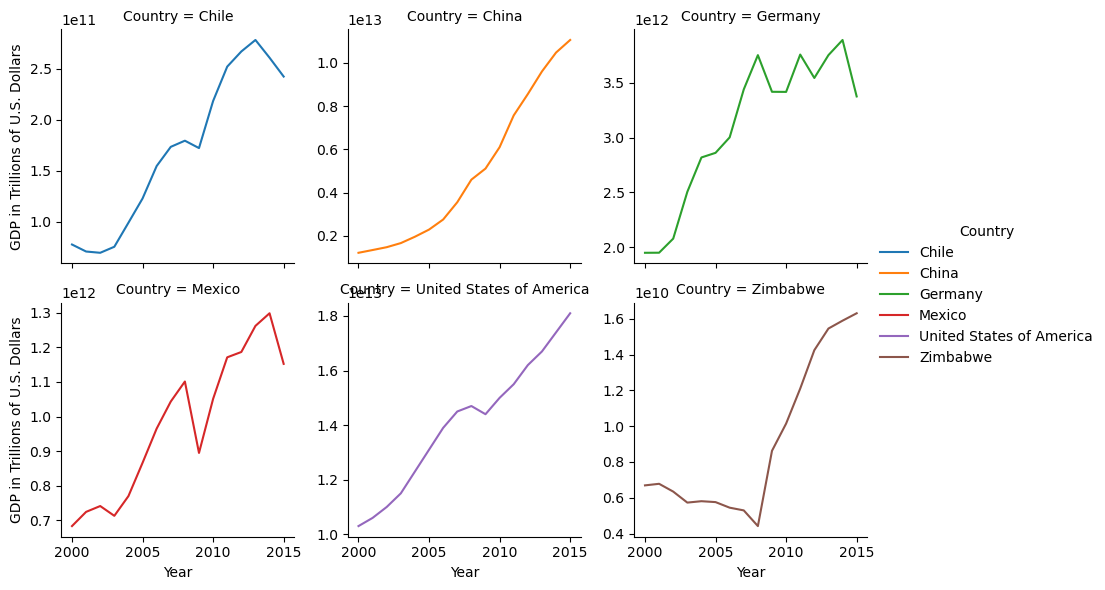

In [203]:
graphGDP = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP
plt.show()
plt.clf()

A closer look shows that most of the countries grew in GDP after 2004, except Zimbabwe had growth around 2008.

#### Life expectancy at birth (years)

<Figure size 640x480 with 0 Axes>

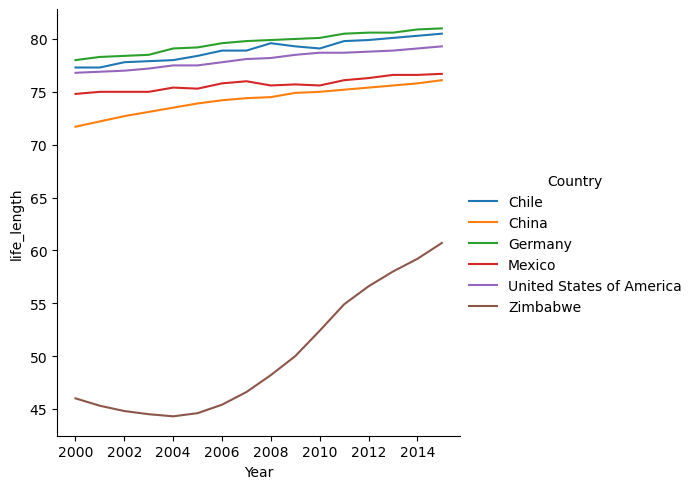

In [204]:
sns.relplot(
    data=gdp_data, kind="line",
    x="Year", y="life_length", hue="Country", 
)
plt.show()
plt.clf()

We clearly see that the life expectancy in Zimbabwe strongly growing after 2004!

<Figure size 640x480 with 0 Axes>

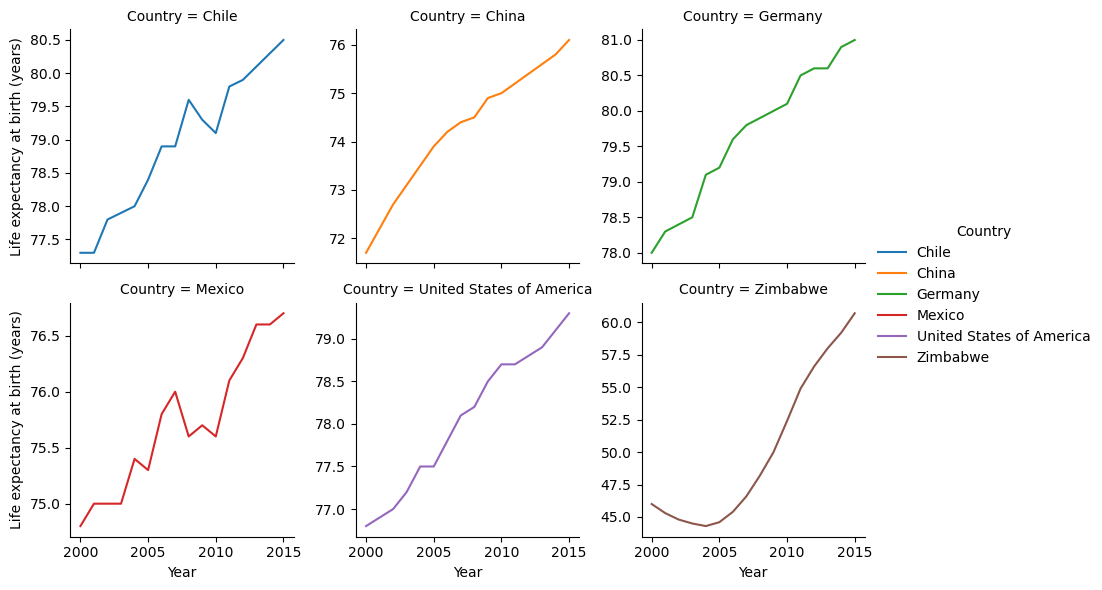

In [205]:
graphGDP = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","life_length")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphGDP
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

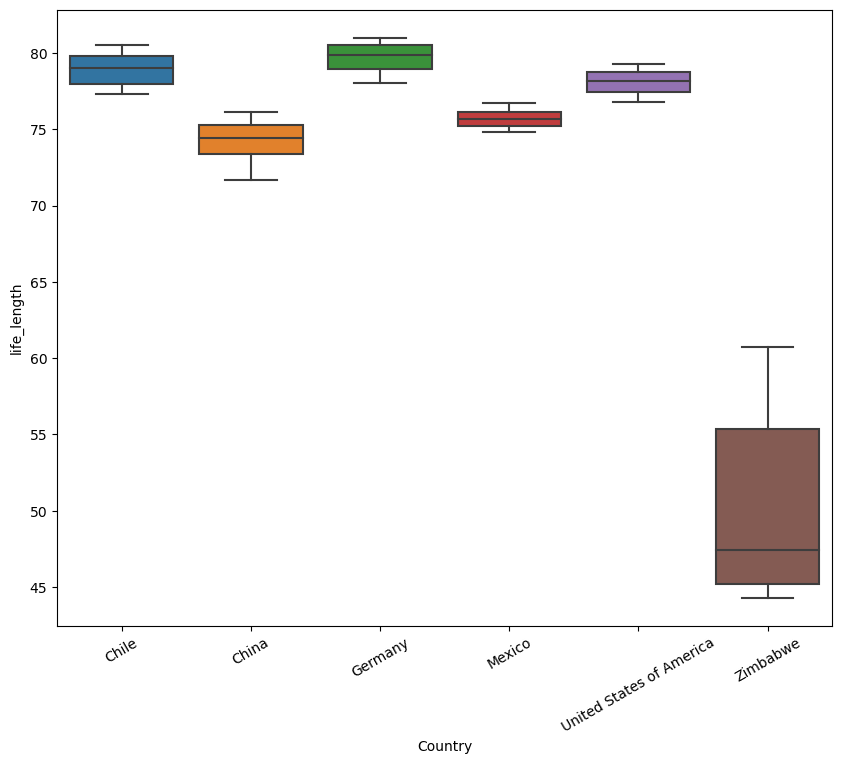

In [235]:
Countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
plt.figure(figsize=(10,8))
sns.boxplot(data = gdp_data, x = 'Country', y = 'life_length')
ax = plt.subplot()
ax.set_xticks(range(len(Countries)))
ax.set_xticklabels(Countries, rotation=30)
plt.show()
plt.clf()

### Finding hiden information

#### The Life expectancy at birth (years) difference between developed and developing countries

In [66]:
deved_country = gdp_data[(gdp_data.Country == 'United States of America') | (gdp_data.Country == 'Germany')].reset_index(drop=True)

In [72]:
deved_country.unique()

array(['Germany', 'United States of America'], dtype=object)

In [74]:
deving_country = gdp_data[(gdp_data.Country == 'Chile') | (gdp_data.Country == 'China') | (gdp_data.Country == 'Mexico') | (gdp_data.Country == 'Zimbabwe')].reset_index(drop=True)

In [78]:
deving_country.Country.unique()

array(['Chile', 'China', 'Mexico', 'Zimbabwe'], dtype=object)

In [213]:
# Finding a mean of the Developed Countries
print(deved_country.life_length.mean())

78.859375


In [214]:
# Finding a mean of the Developing Countries
print(deving_country.life_length.mean())

69.75468749999999


In [212]:
print(deved_country.life_length.mean() - deving_country.life_length.mean())

9.104687500000011


In [218]:
mean_df = pd.DataFrame({
    'status': ['developing', 'developed'],
    'mean_value': [69, 78],
})

<Figure size 640x480 with 0 Axes>

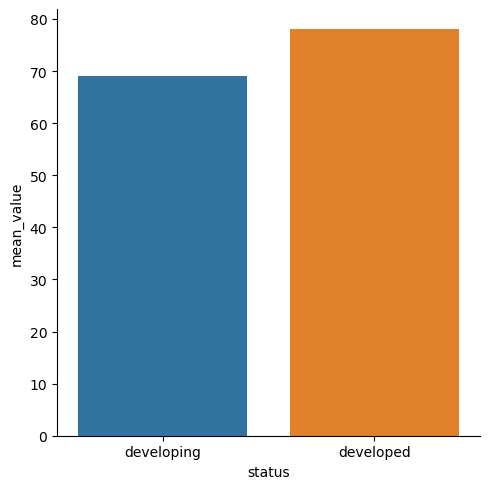

In [219]:
sns.catplot(data=mean_df, x="status", y="mean_value", kind="bar")
plt.show()
plt.clf()

With the mean life expectancy of 78 years in developed countries and 69 years in developing countries, we have a difference in the life expectancy of 9 years between developing and developed countries. 

### Final Conclusions
1. Coming to our general questions, we can see that the life expectancy of the given 6 countries is around 79 years, except Zimbabwe where life expectance is 50 years. But after a close look at the life expectancy of Zimbabwe, we see strong growth after 2004.
2. As the plot is showing GDPs of developed countries (United States of America, Germany) and some developing countries (China and Mexico) are correlated, but for Zimbabwe and Chili correlation of GDP and life expectancy is weak.
3. Generally countries have growth in GDP. China has a strong growth of GDP after 2004 (see additional information), Chili and Mexico are showing growth after 2004, and Zimbabwe around 2008-2009.
4. With the average life expectancy of 78 years in developed countries and 69 years in developing countries, we have a difference in the life expectancy of 9 years between developing and developed countries.
5. Even though we have only 96 observations of 6 countries, we still could see helpful patterns in the given data set.

### Additional information
We see that China's GDP growth is to two main factors: large-scale capital investment (financed by large domestic savings and foreign investment) and rapid productivity growth. These two factors appear to have gone together hand in hand (According to: [Everycrsreport](https://www.everycrsreport.com/reports/RL33534.html#:~:text=Economists%20generally%20attribute%20much%20of,gone%20together%20hand%20in%20hand.)

Generally, Zimbabwe has the lowest life expectancy in the world (according to [BBC News](http://news.bbc.co.uk/2/hi/africa/4890508.stm) but we see growth in 2004 and can conclude that the economics of the country is improving which is also backed up with the growth of GDP of the country.